# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google and acquire leads. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Our aim is to identify the customers who can be a potential lead to us also called as Hot Leads, which in turn will increase the conversion rate. Our aim is to achieve a minimum 80% conversion rate.

## Index

* Step 1: Importing Data and Libraries
* Step 2: Checking the Dataframe
* Step 3: Preparation the Data
* Step 4: Exploratory Data Analysis
* Step 5: Outlier Detection and Treatement
* Step 6: Creating Dummy Variables
* Step 7: Train - Test Split
* Step 8: Feature Scaling
* Step 9: Model Building and Feature Selection using RFE
* Step 10: Creating Confusion Matrix
* Step 11: Plotting the ROC Curve and finding optimal cutoff point
* Step 12: Precision and Recall and F1 Score
* Step 13: Making predictions on the test set
* Step 14: Assigning Lead Score with respect to Lead_Num_ID

## Step 1: Importing  Data and Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Importing statsmaodel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

In [2]:
# Importing datasets
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Checking the Dataframe

In [3]:
# Checking the shape of dataframe
leads_data.shape

(9240, 37)

In [4]:
# Let's see the type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# let's look at the statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Preparation the Data

In [6]:
# Cheking the columns
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Checking Duplicate Values in column 'Prospect ID'
sum(leads_data.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
# Checking Duplicate Values in column 'Lead Number'
sum(leads_data.duplicated(subset = 'Lead Number')) == 0

True

We can see that both the columns 'Prospect ID' and 'Lead Number' are having all unique values hence we drop these columns as they won't add much to the analysis.

In [9]:
#Dropping the columns 'Prospect ID' and 'Lead Number'
leads_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
# Rechecking the columns if the abovementioned columns are dropped or not
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Missing Value Treatment

In [11]:
# Since "Select" is a default value in several columns because customers might not have selected anything in those columns 
# hence Replacing the 'Select' with NA values and we will consider it as null value
leads_data = leads_data.replace('Select', np.nan)

In [12]:
# Percentage of null values
round((leads_data.isnull().sum()/len(leads_data))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
#Creating function to find the percentage of null values and arranging them in descending order
def null_values_percent(leads_data):
    return round((leads_data.isnull().sum()*100/len(leads_data)).sort_values(ascending = False),2)

In [14]:
# Checking the null values of more than 40 percent to drop the columns
null_values_percent(leads_data)[null_values_percent(leads_data)>40]

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Index           45.65
dtype: float64

In [15]:
# dropping values having more than 40 percent missing values
leads_data= leads_data.loc[:,null_values_percent(leads_data)<40]

In [16]:
# Checking the percentage of null values
round((leads_data.isnull().sum()/len(leads_data))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
# Checking the Null values of more than 10 percent
null_values_percent(leads_data)[null_values_percent(leads_data)>10]

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64

Now we will check one by one for attributes having null values more than 10 percent .


In [18]:
# Checking for City
leads_data['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can see that City has most values as either Mumbai or null values . Hence it would not be efficient contributor for the analysis. Hence we will drop the column.

In [19]:
# Dropping the column 'City'
leads_data.drop(['City'], 1, inplace = True)

In [20]:
# Cheking the null values again
null_values_percent(leads_data)[null_values_percent(leads_data)>10]

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64

In [21]:
# Checking for Specialization
leads_data['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# We will replace null values with "Not Specified " as the customer might not have selected the specialization  
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Not Specified')

In [23]:
# Grouping values with specific specializations in order to reduce dummy variations

leads_data['Specialization'] = leads_data['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')

leads_data['Specialization'] = leads_data['Specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')
leads_data['Specialization'] = leads_data['Specialization'].replace(['Business Administration', 'Banking, Investment And Insurance',
                                                          'Travel and Tourism',"E-COMMERCE","Services Excellence","Media and Advertising"], 'Other Specializations')

In [24]:
leads_data['Specialization'].value_counts()

Management Specializations    4253
Not Specified                 3380
Other Specializations         1299
Business Specializations       308
Name: Specialization, dtype: int64

In [25]:
# Cheking the null values again
null_values_percent(leads_data)[null_values_percent(leads_data)>10]

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64

In [26]:
# Checking for Tags
leads_data['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
# We will replace null values with "Not Known" as Tags assigned to customers indicating the current status of the lead. 
leads_data['Tags'] = leads_data['Tags'].replace(np.nan, 'Not Known')

In [28]:
# Grouping values with low count in order to remove bias
leads_data['Tags'] = leads_data['Tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [29]:
leads_data['Tags'].value_counts()

Not Known                              3353
Will revert after reading the email    2072
Other Tags                             1265
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Still Thinking                            6
Interested in Next batch                  5
Name: Tags, dtype: int64

In [30]:
# Cheking the null values again
null_values_percent(leads_data)[null_values_percent(leads_data)>10]

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64

In [31]:
# Checking for "What matters most to you in choosing a course"
leads_data['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
# Dropping "What matters most to you in choosing a course" as we have most of the values either null or Better Career Prospects
leads_data.drop('What matters most to you in choosing a course',1,inplace=True)

In [33]:
# Cheking the null values again
null_values_percent(leads_data)[null_values_percent(leads_data)>10]

What is your current occupation    29.11
Country                            26.63
dtype: float64

In [34]:
# Checking for 'What is your current occupation'
leads_data['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
# Replacing null values with 'Unknown'
# Grouping values with low count in order to remove bias
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unknown')
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(['Housewife', 'Businessman'],'Other')

In [36]:
# Cheking the null values again
null_values_percent(leads_data)[null_values_percent(leads_data)>10]

Country    26.63
dtype: float64

In [37]:
# Checking in 'Country'
leads_data['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [38]:
# We can see max customers belong to India hence replacing null values with India
leads_data['Country'] = leads_data['Country'].replace(np.nan, 'India')

In [39]:
# Percentage of null values
round((leads_data.isnull().sum()/len(leads_data))*100,2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [40]:
# Cheking the percentage values of less than 2 percent
null_values_percent(leads_data)[null_values_percent(leads_data)<2]

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Lead Origin                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Tags                                        0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Search                                      0.00
What is your current occupation             0.00
Specialization                              0.00
Country             

In [41]:
# Treating column "TotalVisits"
leads_data.TotalVisits.value_counts(dropna = False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [42]:
# Checking the mode of TotalVisits
leads_data.TotalVisits.mode()

0    0.0
Name: TotalVisits, dtype: float64

In [43]:
# Replacing null values with mode value
leads_data.TotalVisits = leads_data.TotalVisits.replace(np.nan, 0.0)

In [44]:
# Cheking the dtype of 'TotalVisits'
leads_data.TotalVisits.dtype

dtype('float64')

In [45]:
# Treating column "Page Views Per Visit"
leads_data["Page Views Per Visit"].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [46]:
# Cheking the mode of 'Page Views Per Visit' 
leads_data["Page Views Per Visit"].mode()

0    0.0
Name: Page Views Per Visit, dtype: float64

In [47]:
# Replacing null values with mode value
leads_data["Page Views Per Visit"]=leads_data["Page Views Per Visit"].replace(np.nan, 0.0)

In [48]:
# Checking the dtype 
leads_data["Page Views Per Visit"].dtype

dtype('float64')

In [49]:
# Checking the counts of 'Last Activity'
leads_data["Last Activity"].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
# Cheking the mode
leads_data["Last Activity"].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [51]:
# Replacing null values with mode value
leads_data["Last Activity"].replace(np.nan, 'Email Opened',inplace = True)

In [52]:
# Replacing the less occuring entries as Others
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Marked Spam', 'Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable'],
                                                        'Others')

In [53]:
leads_data['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [54]:
# Percentage of null values
round((leads_data.isnull().sum()/len(leads_data))*100,2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [55]:
# Treating column "Lead Source"
leads_data["Lead Source"].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can see there are two sources google and Google . Making changes to unify these counts. Also replace null values with Google as it is the mode value here.

In [56]:
# Replacing null values with mode value
leads_data["Lead Source"].replace('google','Google',inplace = True)
leads_data["Lead Source"].replace(np.nan,'Google',inplace = True)

In [57]:
#  grouping values with low count in order to remove bias and reduce the number of dummy variables
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Referral Sites', 'Facebook', 'bing', 'google', 'Click2call',
                                                     'Live Chat', 'Social Media', 'Press_Release', 'testone',
                                                     'Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home',
                                                     'NC_EDM', 'youtubechannel'], 'Others')

In [58]:
# Checking the counts of 'Lead Source'
leads_data["Lead Source"].value_counts(dropna = False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Others               203
Welingak Website     142
Name: Lead Source, dtype: int64

In [59]:
# Cheking the Percentage of null values
round((leads_data.isnull().sum()/len(leads_data))*100,2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

## Now we have treated all the missing values.

Now we will check for categorical columns having binary values for data imbalance.

In [60]:
# Checking the counts for "Do Not Call" column
leads_data["Do Not Call"].value_counts(dropna = False)
# Most of the values are No, hence dropping the column as it would not contribute to analysis

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [61]:
# Checking the counts for "Do Not Email" column
leads_data["Do Not Email"].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [62]:
# Checking the counts for "Search" column
leads_data["Search"].value_counts(dropna = False)
# Most of the values are No, hence dropping the column as it would not contribute to analysis

No     9226
Yes      14
Name: Search, dtype: int64

In [63]:
# Checking the counts for "Magazine" column
leads_data["Magazine"].value_counts(dropna = False)
# All the values are No, hence dropping the column as it would not contribute to analysis

No    9240
Name: Magazine, dtype: int64

In [64]:
# Checking the counts for "Newspaper Article" column
leads_data["Newspaper Article"].value_counts(dropna = False)
# Most of the values are No, hence dropping the column as it would not contribute to analysis

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [65]:
# Checking the counts for "Receive More Updates About Our Courses" column
leads_data["Receive More Updates About Our Courses"].value_counts(dropna = False)
# All the values are No, hence dropping the column as it would not contribute to analysis

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [66]:
# Checking the counts for "X Education Forums" column
leads_data["X Education Forums"].value_counts(dropna = False)
# Most of the values are No, hence dropping the column as it would not contribute to analysis

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [67]:
# Checking the counts for "Newspaper" column
leads_data["Newspaper"].value_counts(dropna = False)
# Most of the values are No, hence dropping the column as it would not contribute to analysis

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [68]:
# Checking the counts for "Digital Advertisement" column
leads_data["Digital Advertisement"].value_counts(dropna = False)
# Most of the values are No, hence dropping the column as it would not contribute to analysis

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [69]:
# Checking the counts for "Through Recommendations" column
leads_data["Through Recommendations"].value_counts(dropna = False)
# Most of the values are No, hence dropping the column as it would not contribute to analysis

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [70]:
# Checking the counts for "Receive More Updates About Our Courses" column
leads_data["Receive More Updates About Our Courses"].value_counts(dropna = False)
# All the values are No, hence dropping the column as it would not contribute to analysis

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [71]:
# Checking the counts for "Update me on Supply Chain Content" column
leads_data["Update me on Supply Chain Content"].value_counts(dropna = False)
# All the values are No, hence dropping the column as it would not contribute to analysis

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [72]:
# Checking the counts for "Get updates on DM Content" column
leads_data["Get updates on DM Content"].value_counts(dropna = False)
# All the values are No, hence dropping the column as it would not contribute to analysis

No    9240
Name: Get updates on DM Content, dtype: int64

In [73]:
# Checking the counts for "I agree to pay the amount through cheque" column
leads_data["I agree to pay the amount through cheque"].value_counts(dropna = False)
# All the values are No, hence dropping the column as it would not contribute to analysis

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

Dropping columns due to data imbalance. 

In [74]:
# Dropping all the above columns which are not required at once
leads_data.drop(['I agree to pay the amount through cheque', 'Get updates on DM Content','Update me on Supply Chain Content'
                 ,'Receive More Updates About Our Courses','Through Recommendations',
                 'Digital Advertisement','Newspaper','X Education Forums',
                 'Receive More Updates About Our Courses','Newspaper Article',
                 'Magazine','Search','Do Not Call'], 1, inplace = True)

In [75]:
# Cheking the if the columns are dropped or not
leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [76]:
# Checking the count of Country column
leads_data.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [77]:
# We can see that more than 90 percent values of country are India, hence we can drop the column
leads_data.drop(["Country"],axis = 1,inplace = True)

In [78]:
# Columns "Last Notable Activity" is same as "Last Activity" and there is not much notable difference Hence we can drop the column
leads_data["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [79]:
# Dropping the "Last Notable Activity" column
leads_data.drop(["Last Notable Activity"],axis = 1,inplace = True)

In [80]:
# Checking the null value count and Dtype
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

## Step 4: Exploratory Data Analysis

### Univariate Analysis

### Univariate Analysis(Categorical)

In [81]:
# creating cols containg only Categorical variables
cat_cols=["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
          "What is your current occupation","Tags",
          "A free copy of Mastering The Interview"]

num_cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

Lead Origin


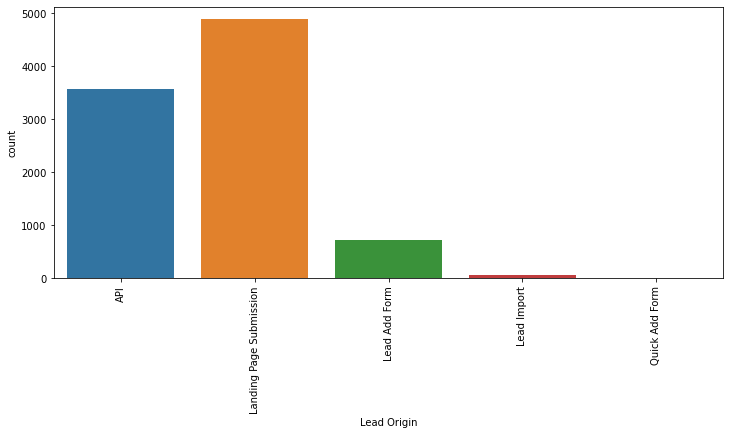

Lead Source


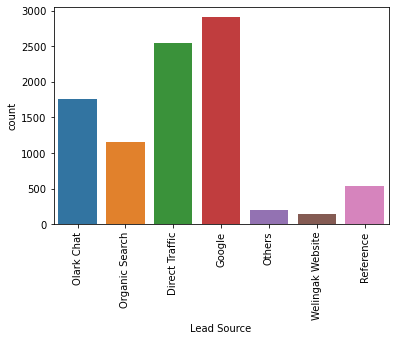

Do Not Email


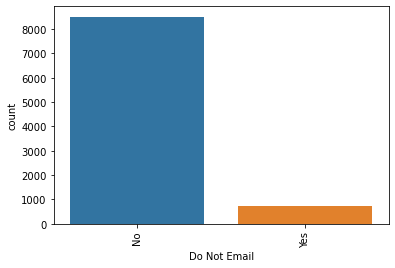

Last Activity


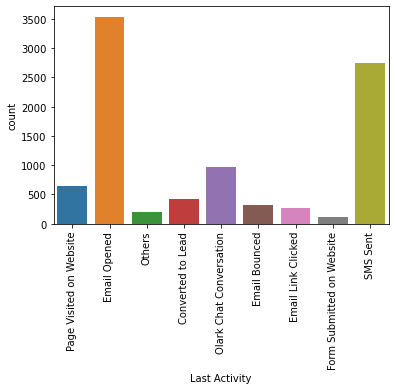

Specialization


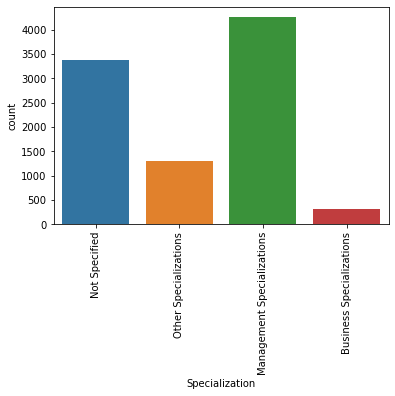

What is your current occupation


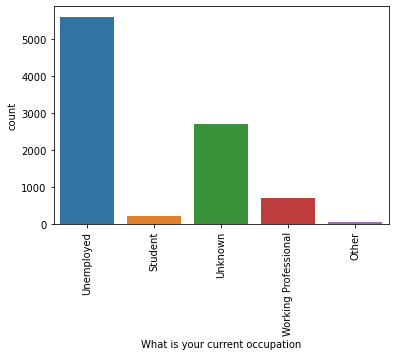

Tags


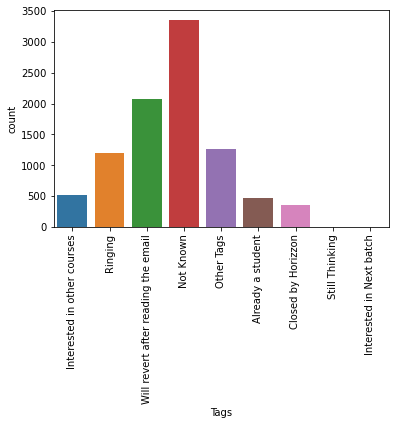

A free copy of Mastering The Interview


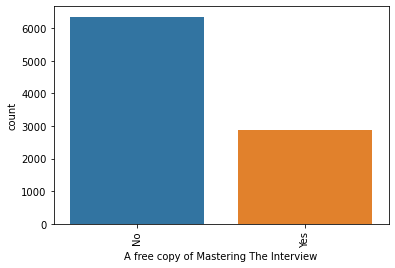

In [82]:
# plotting count plots for categorical columns
plt.figure(figsize=(12,5))
for i in cat_cols:
    print(i)
    sns.countplot(leads_data[i])
    plt.xticks(rotation = 90)
    plt.show()

Observations:
* We can see Google is having highest count for the Lead Source which is logical since maximum number  of people use Google Search Engine prioritily.
* Most of the leads were identified by "Landing Page Submission" and "API" origins.
* Occupation of most of the customers is either unknown or they lie in Unemployed Category
* Most of the customers have "Not Specified" and "Management Specialization" as their Specialization.

### Bivariate Analysis(Categorical)

#### Plotting "Lead Origin" with respect to Target variable "Converted"

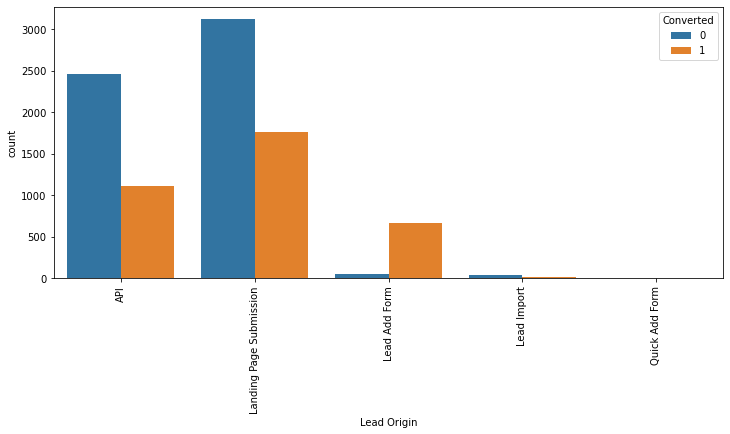

In [83]:
plt.figure(figsize=(12,5))
sns.countplot(x = "Lead Origin" , hue = "Converted", data=leads_data)
plt.xticks(rotation = 90)
plt.show()

Observation:
*    Customers who originated from Lead Add Form have percentage of conversion compared to API and Landing Page Submission.

#### Plotting "Lead Source" with respect to Target variable "Converted"

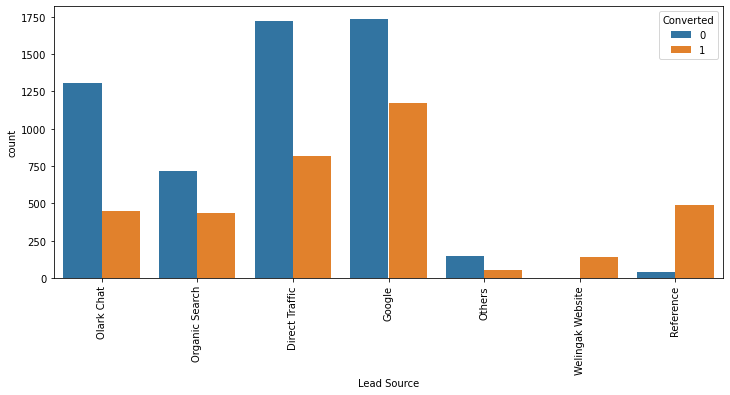

In [84]:
plt.figure(figsize=(12,5))
sns.countplot(x = "Lead Source" , hue = "Converted", data=leads_data)
plt.xticks(rotation = 90)
plt.show()

Observation:
* Conversion rate of Reference Source is maximum and the one who originated rom google and Direct traffic , Olark Chat etc have comparitively low conversion rates.

#### Plotting "Last Activity" with respect to Target variable "Converted"

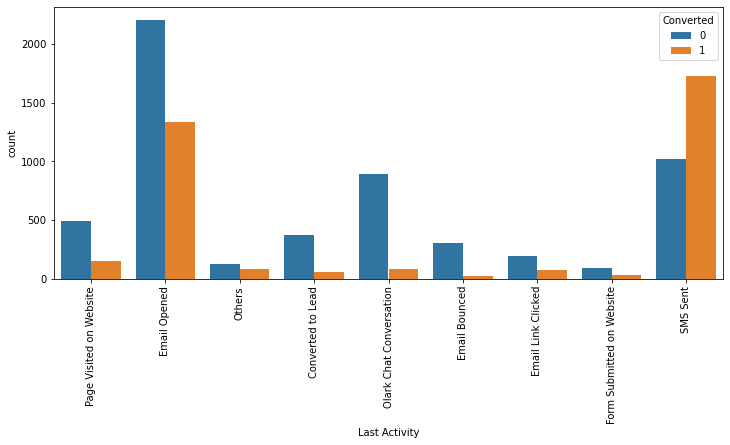

In [85]:
plt.figure(figsize=(12,5))
sns.countplot(x = "Last Activity" , hue = "Converted", data=leads_data)
plt.xticks(rotation = 90)
plt.show()

Observation:
*  When the conversion rate of SMS sent is compared to that of Email opened , the conversion percdentage od SMS Sent is more.     

#### Plotting "Specialization" with respect to Target variable "Converted"

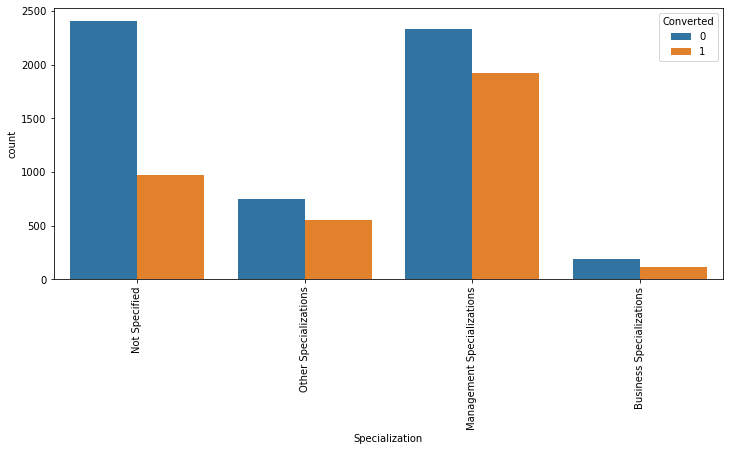

In [86]:
plt.figure(figsize=(12,5))
sns.countplot(x = "Specialization" , hue = "Converted", data=leads_data)
plt.xticks(rotation = 90)
plt.show()

Observation:
*  Customers under management and other specializations have comparitively high conversion rate.     
    

#### Plotting "What is your current occupation" with respect to Target variable "Converted"

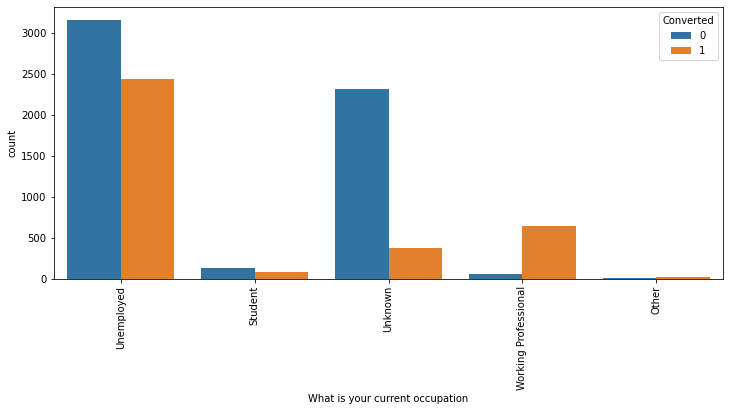

In [87]:
plt.figure(figsize=(12,5))
sns.countplot(x = "What is your current occupation" , hue = "Converted", data=leads_data)
plt.xticks(rotation = 90)
plt.show()

Observation:
*  The conversion rate of working professionals  is high compared to unemployed , the reson might be the working professional are aware of current market requirements and accourdingly they upskill themselves.   
    

### Bivariate Analysis (Categorical vs Continuous)

Lead Origin Vs TotalVisits


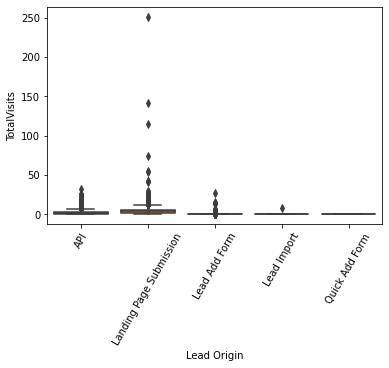

Lead Origin Vs Total Time Spent on Website


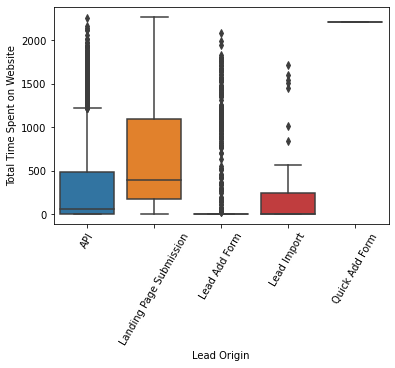

Lead Origin Vs Page Views Per Visit


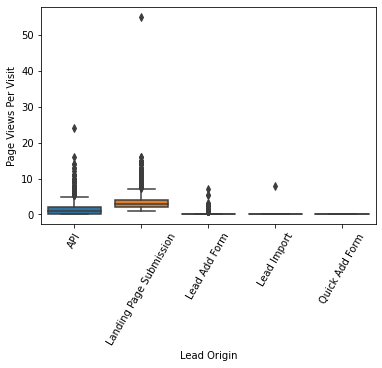

Lead Source Vs TotalVisits


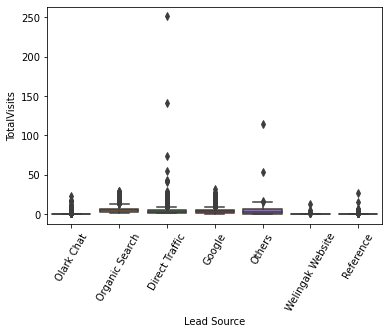

Lead Source Vs Total Time Spent on Website


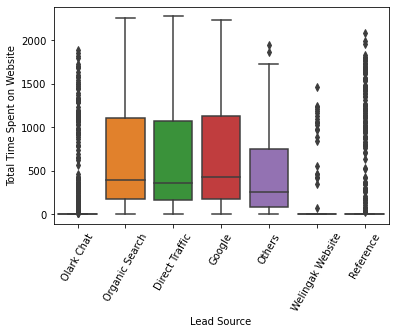

Lead Source Vs Page Views Per Visit


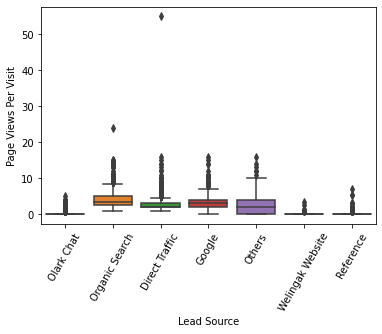

Do Not Email Vs TotalVisits


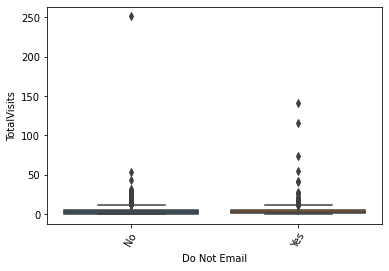

Do Not Email Vs Total Time Spent on Website


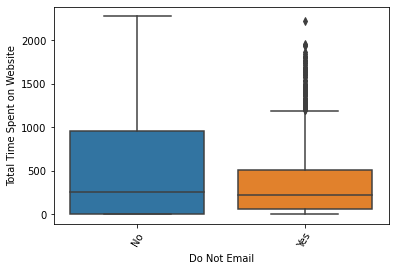

Do Not Email Vs Page Views Per Visit


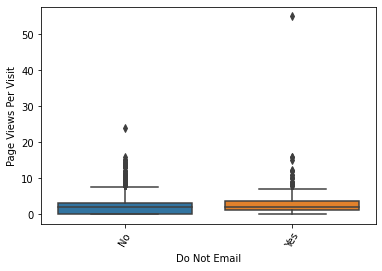

Last Activity Vs TotalVisits


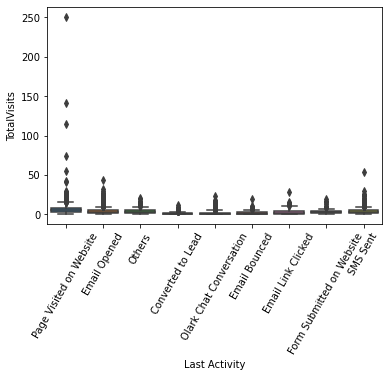

Last Activity Vs Total Time Spent on Website


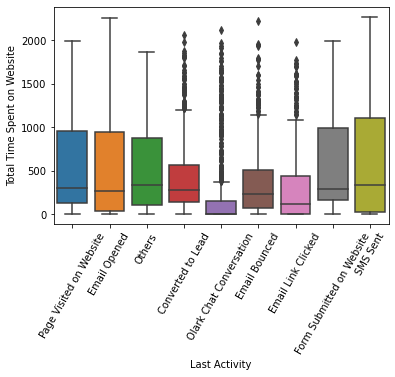

Last Activity Vs Page Views Per Visit


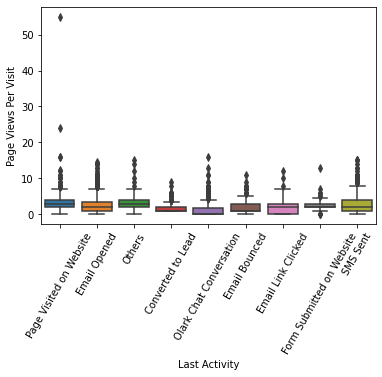

Specialization Vs TotalVisits


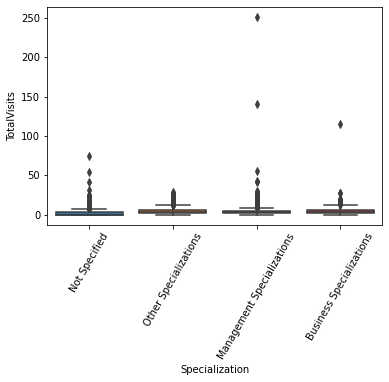

Specialization Vs Total Time Spent on Website


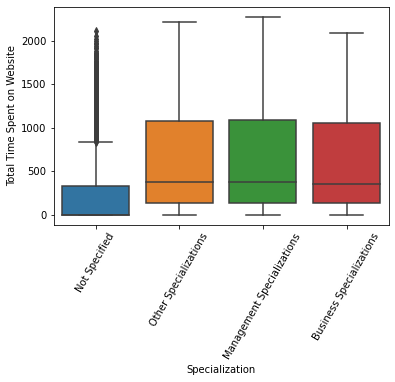

Specialization Vs Page Views Per Visit


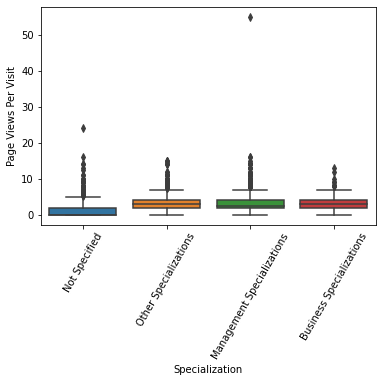

What is your current occupation Vs TotalVisits


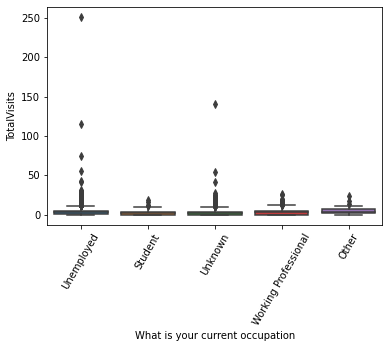

What is your current occupation Vs Total Time Spent on Website


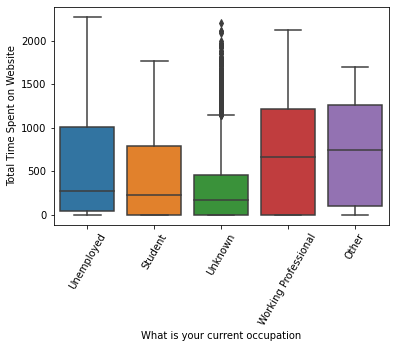

What is your current occupation Vs Page Views Per Visit


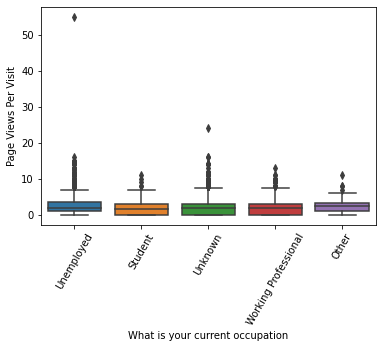

Tags Vs TotalVisits


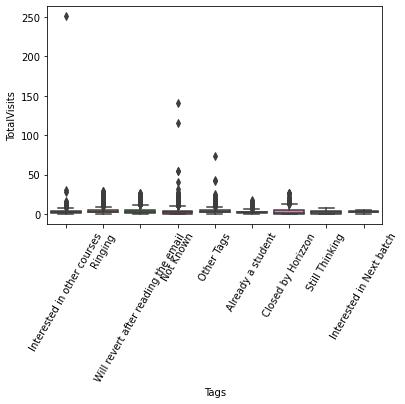

Tags Vs Total Time Spent on Website


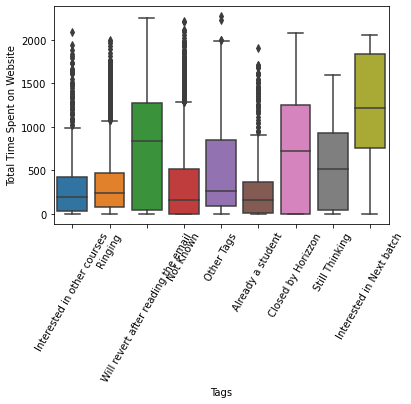

Tags Vs Page Views Per Visit


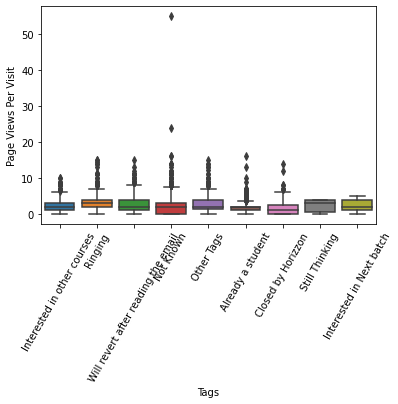

A free copy of Mastering The Interview Vs TotalVisits


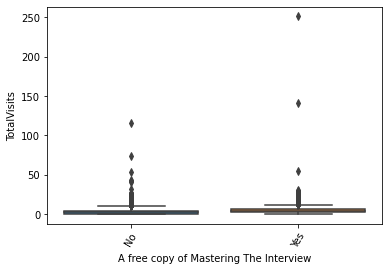

A free copy of Mastering The Interview Vs Total Time Spent on Website


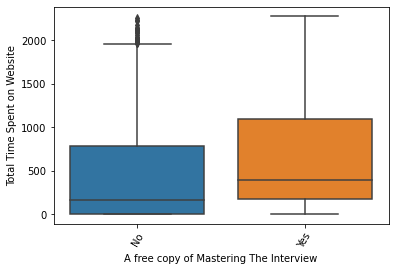

A free copy of Mastering The Interview Vs Page Views Per Visit


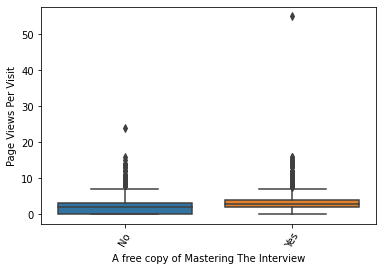

In [88]:
for i in cat_cols:
    for j in num_cols:
        print(i,"Vs",j)
        sns.boxplot(x=leads_data[i],y=leads_data[j])
        plt.xticks(rotation = 60)
        plt.show()

### Univariate Analysis(Continuous)

TotalVisits


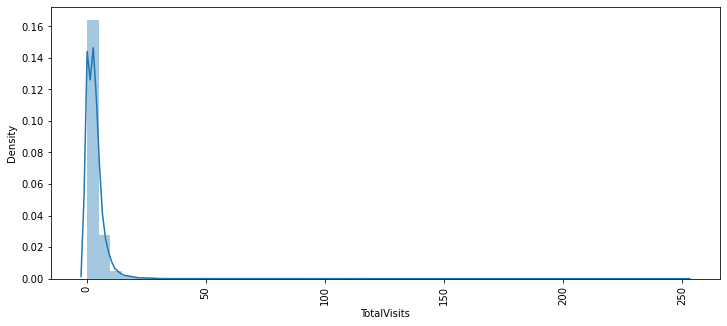

Total Time Spent on Website


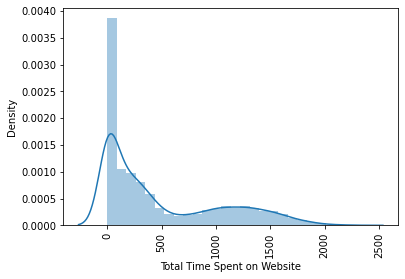

Page Views Per Visit


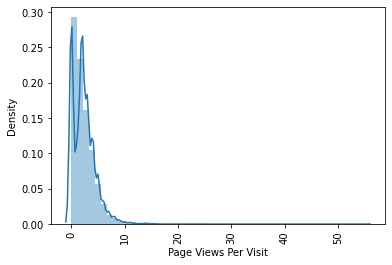

In [89]:
# plotting distplot for numerical variables
plt.figure(figsize=(12,5))
for i in num_cols:
    print(i)
    sns.distplot(leads_data[i])
    plt.xticks(rotation = 90)
    plt.show()


Observation:
* We can see that none of the continuous variables are in Normal Distribution.   

## Step 5: Outlier Detection and  Treatement

#### Checking for "TotalVisits"

In [90]:
# Checking the Stats
leads_data["TotalVisits"].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

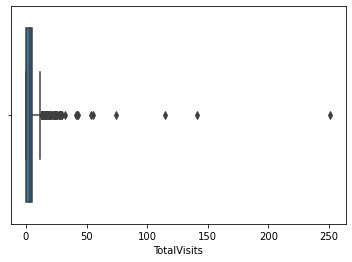

In [91]:
# Plotting the boxplot and checking the outliers
sns.boxplot(leads_data["TotalVisits"])
plt.show()

In [92]:
# Assigning the percentiles
leads_data['TotalVisits'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

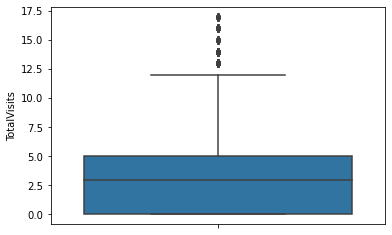

In [93]:
# Removing data point above 99 percentile and plotting the box plot
leads_data = leads_data[(leads_data['TotalVisits'] <= leads_data['TotalVisits'].quantile(0.99))]
sns.boxplot(y = leads_data['TotalVisits'])
plt.show()

#### Checking for "Page Views Per Visit"

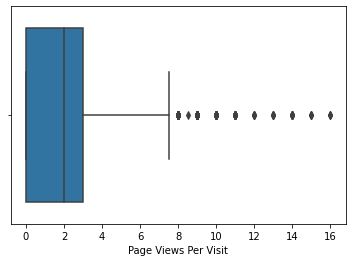

In [94]:
sns.boxplot(leads_data["Page Views Per Visit"])
plt.show()

In [95]:
# Assigning the percentiles
leads_data['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

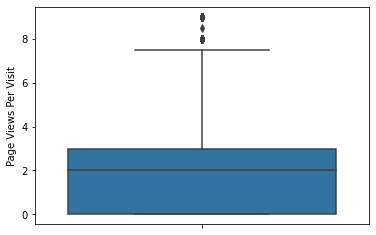

In [96]:
# Removing data point above 99 percentile and plotting the box plot
leads_data = leads_data[(leads_data['Page Views Per Visit'] <= leads_data['Page Views Per Visit'].quantile(0.99))]
sns.boxplot(y = leads_data['Page Views Per Visit'])
plt.show()

#### Checking for "Total Time Spent on Website"

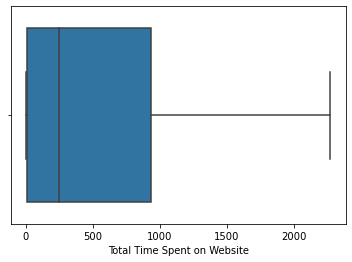

In [97]:
sns.boxplot(leads_data["Total Time Spent on Website"])
plt.show()

We can see there are no outliers on Total Time Spent on Website.

In [98]:
# Checking the top values
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Other Specializations,Student,Will revert after reading the email,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Other Specializations,Unemployed,Ringing,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No


#### Converting some binary variables (Yes/No) to 0/1

In [99]:
# List of variables to map
varlist1 =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the customer list
leads_data[varlist1] = leads_data[varlist1].apply(binary_map)

In [100]:
# Checking the top values
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Other Specializations,Student,Will revert after reading the email,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Other Specializations,Unemployed,Ringing,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0


In [101]:
# Checking the info of columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   int64  
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   object 
 8   Specialization                          9090 non-null   object 
 9   What is your current occupation         9090 non-null   object 
 10  Tags                                    9090 non-null   obje

## Step 6: Creating Dummy Variables

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [102]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                    'What is your current occupation','Tags']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [103]:
# Checking the top values
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Known,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Other Specializations,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Other Specializations,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,0,1


In [104]:
# Checking the info of columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9090 non-null   object 
 1   Lead Source                                           9090 non-null   object 
 2   Do Not Email                                          9090 non-null   int64  
 3   Converted                                             9090 non-null   int64  
 4   TotalVisits                                           9090 non-null   float64
 5   Total Time Spent on Website                           9090 non-null   int64  
 6   Page Views Per Visit                                  9090 non-null   float64
 7   Last Activity                                         9090 non-null   object 
 8   Specialization                                        9090

In [105]:
# Dropping original columns as we have created dummy variables for them
leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                    'What is your current occupation','Tags'], axis = 1,inplace = True)

In [106]:
# Checking the info of columns
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9090 non-null   uint8  
 8   Lead Origin_Lead Import                               9090

## Step 7: Train - Test Split

In [107]:
# Putting target variable to y
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Known,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 8: Feature Scaling

In [110]:
# Checking the num_cols variable
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [111]:
# Assigning the StandardScaler to scaler variable
scaler = StandardScaler()

# Fitting and Transforming the Train data set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Not Known,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
302,0,1.340545,-0.428736,0.059262,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6087,1,-1.070195,-0.887355,-1.178546,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1033,0,0.651762,-0.025151,1.477695,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7656,1,0.996153,-0.241619,2.008943,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3241,0,0.307371,0.897591,-0.471986,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
# Checking the Coversion Rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

38.448844884488445

We have almost 38% conversion rate. 

## Step 9: Model Building and Feature Selection using RFE

## Model 1

In [113]:
# Logistic regression model
logmod1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.7
Date:                Mon, 23 Jan 2023   Deviance:                       2873.3
Time:                        00:06:01   Pearson chi2:                 7.52e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5844
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.9025      1.113     -4.405      0.000      -7.084      -2.721
Do Not Email                                            -1.1688      0.256     -4.557      0.000      -1.671      -0.666
TotalVisits                                              0.2832      0.074      3.835      0.000       0.138       0.428
Total Time Spent on Website                              1.0742      0.056     19.059      0.000       0.964       1.185
Page Views Per Visit                                    -0.3099      0.085     -3.661      0.000      -0.476      -0.144
A free copy of Mastering The Interview                  -0.0751      0.157     -0.480      0.631      -0.382       0.232
Lead Origin_Landing Page Submission                     -0.2286      0.208     -1.098      0.272      -0.637       0.180
Lead Origin_Lead Add Form                                2.6108      0.987      2.646      0.008       0.677       4.545
Lead Origin_Lead Import                                 -0.9013      0.814     -1.108      0.268      -2.496       0.694
Lead Origin_Quick Add Form                              21.0135   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Google                                      -0.0360      0.164     -0.220      0.826      -0.357       0.285
Lead Source_Olark Chat                                   0.9051      0.227      3.988      0.000       0.460       1.350
Lead Source_Organic Search                              -0.4259      0.191     -2.226      0.026      -0.801      -0.051
Lead Source_Others                                       0.1532      0.421      0.364      0.716      -0.672       0.978
Lead Source_Reference                                   -1.5146      1.046     -1.448      0.148      -3.564       0.535
Lead Source_Welingak Website                             2.5322      1.424      1.778      0.075      -0.259       5.323
Last Activity_Email Bounced                             -0.6430      0.575     -1.118      0.263      -1.770       0.484
Last Activity_Email Link Clicked                         0.4480      0.405      1.106      0.269      -0.346       1.242
Last Activity_Email Opened                               0.8686      0.288      3.014      0.003       0.304       1.433
Last Activity_Form Submitted on Website                  0.4710      0.494      0.953      0.341      -0.498       1.440
Last Activity_Olark Chat Conversation                   -0.4444      0.346     -1.285      0.199      -1.122       0.233
Last Activity_Others                                     1.0806      0.458      2.357      0.018       0.182       1.979
Last Activity_Page Visited on Website                    0

### Feature Selection Using RFE

In [114]:
# Assigning a varaible to LogisticRegression
logreg = LogisticRegression()

In [115]:
# running RFE with 20 variables as output
rfe = RFE(logreg,n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [116]:
# Checking the Rank of the varaibles with the help of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 12),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 9),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Manageme

In [117]:
# Cheking the supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Interested in other courses', 'Tags_Not Known', 'Tags_Other Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [118]:
# Cheking the columns which are not supported
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Management Specializations',
       'Specialization_Not Specified', 'Specialization_Other Specializations',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Still Thinking'],
      dtype='object')

## Model 2

#### Assessing the model with StatsModels

In [119]:
# Adding the Constant
X_train_sm = sm.add_constant(X_train[col])

In [120]:
# Model 2
logmod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.9
Date:                Mon, 23 Jan 2023   Deviance:                       2909.8
Time:                        00:06:03   Pearson chi2:                 7.15e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5820
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.2294      0.536     -9.752      0.000      -6.280      -4.178
Do Not Email                                            -1.1622      0.251     -4.637      0.000      -1.653      -0.671
Total Time Spent on Website                              1.0854      0.055     19.675      0.000       0.977       1.194
Lead Origin_Lead Add Form                                2.9481      0.968      3.045      0.002       1.050       4.846
Lead Source_Olark Chat                                   1.2460      0.143      8.705      0.000       0.965       1.527
Lead Source_Reference                                   -1.4205      1.017     -1.397      0.163      -3.414       0.573
Lead Source_Welingak Website                             2.5203      1.408      1.790      0.073      -0.239       5.280
Last Activity_Email Bounced                             -0.9381      0.512     -1.831      0.067      -1.942       0.066
Last Activity_Email Opened                               0.5939      0.157      3.773      0.000       0.285       0.902
Last Activity_Olark Chat Conversation                   -0.6652      0.242     -2.753      0.006      -1.139      -0.192
Last Activity_Others                                     0.7539      0.385      1.956      0.050      -0.002       1.509
Last Activity_SMS Sent                                   1.9655      0.159     12.326      0.000       1.653       2.278
What is your current occupation_Unknown                 -1.8876      0.139    -13.588      0.000      -2.160      -1.615
What is your current occupation_Working Professional     0.6227      0.291      2.143      0.032       0.053       1.192
Tags_Closed by Horizzon                                  8.7682      0.899      9.752      0.000       7.006      10.530
Tags_Interested in Next batch                           24.2819   1.52e+04      0.002      0.999   -2.97e+04    2.98e+04
Tags_Interested in other courses                         0.3577      0.657      0.544      0.586      -0.930       1.645
Tags_Not Known                                           4.2157      0.531      7.936      0.000       3.175       5.257
Tags_Other Tags                                          2.9742      0.528      5.638      0.000       1.940       4.008
Tags_Ringing                                             0.0846      0.561      0.151      0.880      -1.016       1.185
Tags_Will revert after reading the email                 6.9651      0.543     12.820      0.000       5.900       8.030
========================================================================================================================
"""

In [121]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,19.77
4,Lead Source_Reference,15.60
16,Tags_Not Known,6.66
5,Lead Source_Welingak Website,5.09
11,What is your current occupation_Unknown,4.53
7,Last Activity_Email Opened,3.03
10,Last Activity_SMS Sent,2.92
19,Tags_Will revert after reading the email,2.85
0,Do Not Email,1.89
8,Last Activity_Olark Chat Conversation,1.85


In [122]:
# Dropping "Tags_Interested in Next batch" as p value is very high
col1 = col.drop(["Tags_Interested in Next batch"])
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Not Known', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

## Model 3

In [123]:
# Adding the Constant
X_train_sm = sm.add_constant(X_train[col1])

In [124]:
# Model 3
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.1
Date:                Mon, 23 Jan 2023   Deviance:                       2922.2
Time:                        00:06:04   Pearson chi2:                 7.14e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7490      0.428    -11.107      0.000      -5.587      -3.911
Do Not Email                                            -1.1162      0.248     -4.500      0.000      -1.602      -0.630
Total Time Spent on Website                              1.0875      0.055     19.787      0.000       0.980       1.195
Lead Origin_Lead Add Form                                2.9436      0.971      3.033      0.002       1.041       4.846
Lead Source_Olark Chat                                   1.2424      0.143      8.691      0.000       0.962       1.523
Lead Source_Reference                                   -1.4163      1.020     -1.389      0.165      -3.415       0.582
Lead Source_Welingak Website                             2.5230      1.410      1.790      0.073      -0.240       5.286
Last Activity_Email Bounced                             -0.9744      0.510     -1.909      0.056      -1.975       0.026
Last Activity_Email Opened                               0.5948      0.157      3.784      0.000       0.287       0.903
Last Activity_Olark Chat Conversation                   -0.6597      0.241     -2.732      0.006      -1.133      -0.186
Last Activity_Others                                     0.7486      0.385      1.944      0.052      -0.006       1.504
Last Activity_SMS Sent                                   1.9845      0.159     12.464      0.000       1.672       2.297
What is your current occupation_Unknown                 -1.8900      0.139    -13.587      0.000      -2.163      -1.617
What is your current occupation_Working Professional     0.6195      0.290      2.134      0.033       0.051       1.188
Tags_Closed by Horizzon                                  8.2872      0.839      9.877      0.000       6.643       9.932
Tags_Interested in other courses                        -0.1298      0.572     -0.227      0.820      -1.251       0.991
Tags_Not Known                                           3.7283      0.421      8.847      0.000       2.902       4.554
Tags_Other Tags                                          2.4828      0.416      5.963      0.000       1.667       3.299
Tags_Ringing                                            -0.4110      0.458     -0.897      0.370      -1.309       0.487
Tags_Will revert after reading the email                 6.4801      0.436     14.848      0.000       5.625       7.335
========================================================================================================================
"""

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,19.77
4,Lead Source_Reference,15.60
15,Tags_Not Known,6.66
5,Lead Source_Welingak Website,5.09
11,What is your current occupation_Unknown,4.53
7,Last Activity_Email Opened,3.03
10,Last Activity_SMS Sent,2.90
18,Tags_Will revert after reading the email,2.84
0,Do Not Email,1.89
8,Last Activity_Olark Chat Conversation,1.84


In [126]:
# Dropping "Tags_Interested in other courses" as p value is very high
col2 = col1.drop(["Tags_Interested in other courses"])
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Not Known', 'Tags_Other Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

## Model 4

In [127]:
# Adding the constant
X_train_sm = sm.add_constant(X_train[col2])

In [128]:
# Model 4
logmod4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.1
Date:                Mon, 23 Jan 2023   Deviance:                       2922.2
Time:                        00:06:04   Pearson chi2:                 7.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8154      0.319    -15.115      0.000      -5.440      -4.191
Do Not Email                                            -1.1151      0.248     -4.495      0.000      -1.601      -0.629
Total Time Spent on Website                              1.0875      0.055     19.786      0.000       0.980       1.195
Lead Origin_Lead Add Form                                2.9433      0.971      3.032      0.002       1.041       4.846
Lead Source_Olark Chat                                   1.2427      0.143      8.693      0.000       0.962       1.523
Lead Source_Reference                                   -1.4172      1.019     -1.390      0.164      -3.415       0.581
Lead Source_Welingak Website                             2.5230      1.410      1.790      0.073      -0.240       5.286
Last Activity_Email Bounced                             -0.9746      0.511     -1.909      0.056      -1.975       0.026
Last Activity_Email Opened                               0.5953      0.157      3.788      0.000       0.287       0.903
Last Activity_Olark Chat Conversation                   -0.6604      0.241     -2.736      0.006      -1.134      -0.187
Last Activity_Others                                     0.7484      0.385      1.943      0.052      -0.006       1.503
Last Activity_SMS Sent                                   1.9844      0.159     12.464      0.000       1.672       2.296
What is your current occupation_Unknown                 -1.8900      0.139    -13.587      0.000      -2.163      -1.617
What is your current occupation_Working Professional     0.6176      0.290      2.131      0.033       0.050       1.186
Tags_Closed by Horizzon                                  8.3541      0.788     10.599      0.000       6.809       9.899
Tags_Not Known                                           3.7945      0.311     12.196      0.000       3.185       4.404
Tags_Other Tags                                          2.5492      0.304      8.393      0.000       1.954       3.144
Tags_Ringing                                            -0.3445      0.359     -0.961      0.337      -1.047       0.358
Tags_Will revert after reading the email                 6.5467      0.330     19.866      0.000       5.901       7.193
========================================================================================================================
"""

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,19.77
4,Lead Source_Reference,15.60
14,Tags_Not Known,6.26
5,Lead Source_Welingak Website,5.09
11,What is your current occupation_Unknown,4.51
10,Last Activity_SMS Sent,2.70
7,Last Activity_Email Opened,2.68
17,Tags_Will revert after reading the email,2.67
0,Do Not Email,1.89
3,Lead Source_Olark Chat,1.84


In [130]:
# Dropping "Tags_Ringing" as p value is very high
col3 = col2.drop(["Tags_Ringing"])
col3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Not Known', 'Tags_Other Tags',
       'Tags_Will revert after reading the email'],
      dtype='object')

## Model 5

In [131]:
# Adding the constant
X_train_sm = sm.add_constant(X_train[col3])

In [132]:
# Model 5
logmod5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.6
Date:                Mon, 23 Jan 2023   Deviance:                       2923.1
Time:                        00:06:05   Pearson chi2:                 7.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0423      0.227    -22.249      0.000      -5.487      -4.598
Do Not Email                                            -1.1099      0.248     -4.477      0.000      -1.596      -0.624
Total Time Spent on Website                              1.0882      0.055     19.797      0.000       0.980       1.196
Lead Origin_Lead Add Form                                2.9171      0.958      3.045      0.002       1.039       4.795
Lead Source_Olark Chat                                   1.2457      0.143      8.718      0.000       0.966       1.526
Lead Source_Reference                                   -1.3954      1.007     -1.385      0.166      -3.369       0.579
Lead Source_Welingak Website                             2.5504      1.401      1.821      0.069      -0.195       5.296
Last Activity_Email Bounced                             -0.9811      0.511     -1.922      0.055      -1.982       0.019
Last Activity_Email Opened                               0.5937      0.157      3.774      0.000       0.285       0.902
Last Activity_Olark Chat Conversation                   -0.6592      0.242     -2.727      0.006      -1.133      -0.185
Last Activity_Others                                     0.7402      0.385      1.924      0.054      -0.014       1.494
Last Activity_SMS Sent                                   1.9713      0.159     12.423      0.000       1.660       2.282
What is your current occupation_Unknown                 -1.8885      0.139    -13.589      0.000      -2.161      -1.616
What is your current occupation_Working Professional     0.6271      0.291      2.155      0.031       0.057       1.197
Tags_Closed by Horizzon                                  8.5816      0.755     11.362      0.000       7.101      10.062
Tags_Not Known                                           4.0248      0.211     19.058      0.000       3.611       4.439
Tags_Other Tags                                          2.7811      0.198     14.051      0.000       2.393       3.169
Tags_Will revert after reading the email                 6.7761      0.239     28.395      0.000       6.308       7.244
========================================================================================================================
"""

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,19.77
4,Lead Source_Reference,15.60
14,Tags_Not Known,5.69
5,Lead Source_Welingak Website,5.09
11,What is your current occupation_Unknown,4.50
16,Tags_Will revert after reading the email,2.27
10,Last Activity_SMS Sent,1.96
7,Last Activity_Email Opened,1.89
0,Do Not Email,1.88
3,Lead Source_Olark Chat,1.84


In [134]:
# Dropping "Lead Source_Reference" as p value is very high
col4 = col3.drop(["Lead Source_Reference"])
col4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Not Known', 'Tags_Other Tags',
       'Tags_Will revert after reading the email'],
      dtype='object')

## Model 6

In [135]:
# Adding the constant
X_train_sm = sm.add_constant(X_train[col4])

In [136]:
# Model 6
logmod6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1462.6
Date:                Mon, 23 Jan 2023   Deviance:                       2925.3
Time:                        00:06:05   Pearson chi2:                 7.10e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0399      0.226    -22.255      0.000      -5.484      -4.596
Do Not Email                                            -1.1011      0.247     -4.466      0.000      -1.584      -0.618
Total Time Spent on Website                              1.0873      0.055     19.794      0.000       0.980       1.195
Lead Origin_Lead Add Form                                1.6940      0.317      5.340      0.000       1.072       2.316
Lead Source_Olark Chat                                   1.2428      0.143      8.702      0.000       0.963       1.523
Lead Source_Welingak Website                             3.7596      1.078      3.486      0.000       1.646       5.873
Last Activity_Email Bounced                             -0.9516      0.510     -1.866      0.062      -1.951       0.048
Last Activity_Email Opened                               0.5924      0.157      3.765      0.000       0.284       0.901
Last Activity_Olark Chat Conversation                   -0.6582      0.242     -2.724      0.006      -1.132      -0.185
Last Activity_Others                                     0.7574      0.382      1.984      0.047       0.009       1.506
Last Activity_SMS Sent                                   1.9724      0.159     12.431      0.000       1.661       2.283
What is your current occupation_Unknown                 -1.8963      0.139    -13.662      0.000      -2.168      -1.624
What is your current occupation_Working Professional     0.6024      0.290      2.076      0.038       0.034       1.171
Tags_Closed by Horizzon                                  8.5287      0.754     11.310      0.000       7.051      10.007
Tags_Not Known                                           4.0306      0.211     19.106      0.000       3.617       4.444
Tags_Other Tags                                          2.7771      0.198     14.046      0.000       2.390       3.165
Tags_Will revert after reading the email                 6.7673      0.238     28.411      0.000       6.300       7.234
========================================================================================================================
"""

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_Not Known,5.69
10,What is your current occupation_Unknown,4.50
15,Tags_Will revert after reading the email,2.26
9,Last Activity_SMS Sent,1.96
6,Last Activity_Email Opened,1.89
0,Do Not Email,1.88
2,Lead Origin_Lead Add Form,1.85
3,Lead Source_Olark Chat,1.84
5,Last Activity_Email Bounced,1.80
7,Last Activity_Olark Chat Conversation,1.59


In [138]:
# Dropping "Last Activity_Email Bounced" as p value is very high
col5 = col4.drop(["Last Activity_Email Bounced"])
col5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Not Known', 'Tags_Other Tags',
       'Tags_Will revert after reading the email'],
      dtype='object')

## Model 7

In [139]:
# Adding the constant
X_train_sm = sm.add_constant(X_train[col5])

In [140]:
# Model 7
logmod7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1464.5
Date:                Mon, 23 Jan 2023   Deviance:                       2929.0
Time:                        00:06:05   Pearson chi2:                 6.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5808
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.1094      0.225    -22.721      0.000      -5.550      -4.669
Do Not Email                                            -1.3186      0.223     -5.908      0.000      -1.756      -0.881
Total Time Spent on Website                              1.0863      0.055     19.767      0.000       0.979       1.194
Lead Origin_Lead Add Form                                1.6950      0.316      5.366      0.000       1.076       2.314
Lead Source_Olark Chat                                   1.2422      0.143      8.701      0.000       0.962       1.522
Lead Source_Welingak Website                             3.6929      1.066      3.466      0.001       1.604       5.781
Last Activity_Email Opened                               0.6618      0.154      4.286      0.000       0.359       0.964
Last Activity_Olark Chat Conversation                   -0.5854      0.239     -2.446      0.014      -1.055      -0.116
Last Activity_Others                                     0.8855      0.376      2.352      0.019       0.148       1.623
Last Activity_SMS Sent                                   2.0563      0.154     13.361      0.000       1.755       2.358
What is your current occupation_Unknown                 -1.8870      0.139    -13.615      0.000      -2.159      -1.615
What is your current occupation_Working Professional     0.6006      0.289      2.076      0.038       0.034       1.167
Tags_Closed by Horizzon                                  8.4819      0.747     11.355      0.000       7.018       9.946
Tags_Not Known                                           4.0230      0.211     19.069      0.000       3.609       4.436
Tags_Other Tags                                          2.7866      0.198     14.086      0.000       2.399       3.174
Tags_Will revert after reading the email                 6.7667      0.238     28.411      0.000       6.300       7.233
========================================================================================================================
"""

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Not Known,5.63
9,What is your current occupation_Unknown,4.50
14,Tags_Will revert after reading the email,2.24
8,Last Activity_SMS Sent,1.88
2,Lead Origin_Lead Add Form,1.85
5,Last Activity_Email Opened,1.85
3,Lead Source_Olark Chat,1.84
6,Last Activity_Olark Chat Conversation,1.57
4,Lead Source_Welingak Website,1.40
1,Total Time Spent on Website,1.38


In [142]:
# Dropping "Tags_Not Known" as VIF value > 5
col6 = col5.drop(["Tags_Not Known"])
col6

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Other Tags',
       'Tags_Will revert after reading the email'],
      dtype='object')

## Model 8

In [143]:
# Adding the constant
X_train_sm = sm.add_constant(X_train[col6])

In [144]:
# Model 8
logmod8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1733.0
Date:                Mon, 23 Jan 2023   Deviance:                       3466.1
Time:                        00:06:06   Pearson chi2:                 5.73e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5439
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1999      0.150    -21.335      0.000      -3.494      -2.906
Do Not Email                                            -1.0508      0.213     -4.943      0.000      -1.468      -0.634
Total Time Spent on Website                              1.0393      0.049     21.268      0.000       0.944       1.135
Lead Origin_Lead Add Form                                1.6059      0.277      5.795      0.000       1.063       2.149
Lead Source_Olark Chat                                   1.6021      0.131     12.194      0.000       1.345       1.860
Lead Source_Welingak Website                             5.5958      1.052      5.319      0.000       3.534       7.658
Last Activity_Email Opened                               0.7278      0.146      4.995      0.000       0.442       1.013
Last Activity_Olark Chat Conversation                   -0.6291      0.231     -2.727      0.006      -1.081      -0.177
Last Activity_Others                                     0.7623      0.359      2.121      0.034       0.058       1.467
Last Activity_SMS Sent                                   2.0727      0.145     14.321      0.000       1.789       2.356
What is your current occupation_Unknown                  0.0263      0.105      0.251      0.802      -0.179       0.231
What is your current occupation_Working Professional     0.6375      0.276      2.310      0.021       0.097       1.178
Tags_Closed by Horizzon                                  6.5185      0.727      8.971      0.000       5.094       7.943
Tags_Other Tags                                          0.7212      0.116      6.207      0.000       0.493       0.949
Tags_Will revert after reading the email                 4.7832      0.175     27.400      0.000       4.441       5.125
========================================================================================================================
"""

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Tags_Will revert after reading the email,2.07
2,Lead Origin_Lead Add Form,1.85
3,Lead Source_Olark Chat,1.78
8,Last Activity_SMS Sent,1.69
5,Last Activity_Email Opened,1.68
9,What is your current occupation_Unknown,1.64
6,Last Activity_Olark Chat Conversation,1.55
1,Total Time Spent on Website,1.37
10,What is your current occupation_Working Profes...,1.34
4,Lead Source_Welingak Website,1.33


In [146]:
# Dropping "What is your current occupation_Unknown" as p value is very high
col7 = col6.drop(["What is your current occupation_Unknown"])
col7

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Other Tags',
       'Tags_Will revert after reading the email'],
      dtype='object')

## Model 9

In [147]:
# Adding the constant
X_train_sm = sm.add_constant(X_train[col7])

In [148]:
# Model 9
logmod9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1733.1
Date:                Mon, 23 Jan 2023   Deviance:                       3466.1
Time:                        00:06:06   Pearson chi2:                 5.72e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5438
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1875      0.142    -22.521      0.000      -3.465      -2.910
Do Not Email                                            -1.0500      0.213     -4.940      0.000      -1.467      -0.633
Total Time Spent on Website                              1.0393      0.049     21.270      0.000       0.944       1.135
Lead Origin_Lead Add Form                                1.6009      0.276      5.799      0.000       1.060       2.142
Lead Source_Olark Chat                                   1.6032      0.131     12.209      0.000       1.346       1.861
Lead Source_Welingak Website                             5.5893      1.052      5.315      0.000       3.528       7.650
Last Activity_Email Opened                               0.7271      0.146      4.991      0.000       0.442       1.013
Last Activity_Olark Chat Conversation                   -0.6264      0.230     -2.718      0.007      -1.078      -0.175
Last Activity_Others                                     0.7627      0.359      2.123      0.034       0.058       1.467
Last Activity_SMS Sent                                   2.0715      0.145     14.321      0.000       1.788       2.355
What is your current occupation_Working Professional     0.6348      0.275      2.304      0.021       0.095       1.175
Tags_Closed by Horizzon                                  6.5083      0.725      8.971      0.000       5.086       7.930
Tags_Other Tags                                          0.7110      0.109      6.535      0.000       0.498       0.924
Tags_Will revert after reading the email                 4.7720      0.169     28.283      0.000       4.441       5.103
========================================================================================================================
"""

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,1.93
2,Lead Origin_Lead Add Form,1.84
3,Lead Source_Olark Chat,1.75
8,Last Activity_SMS Sent,1.51
6,Last Activity_Olark Chat Conversation,1.41
5,Last Activity_Email Opened,1.38
1,Total Time Spent on Website,1.37
9,What is your current occupation_Working Profes...,1.34
4,Lead Source_Welingak Website,1.32
10,Tags_Closed by Horizzon,1.31


Now we can see that all the p values are less than 0.05 and VIF values are less than 5.

In [150]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.051862
6087    0.027746
1033    0.076812
7656    0.081879
3241    0.989938
5738    0.034904
7366    0.041769
3680    0.020829
4170    0.989067
43      0.049299
dtype: float64

In [151]:
# Reshapping the train values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05186222, 0.02774631, 0.07681166, 0.08187906, 0.98993788,
       0.03490413, 0.04176945, 0.0208287 , 0.98906701, 0.0492992 ])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [152]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Num_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num_ID
0,0,0.051862,302
1,0,0.027746,6087
2,0,0.076812,1033
3,0,0.081879,7656
4,1,0.989938,3241


#### Creating new column 'predicted' with 1 if 'Converted_Prob' > 0.5 else 0

In [153]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num_ID,predicted
0,0,0.051862,302,0
1,0,0.027746,6087,0
2,0,0.076812,1033,0
3,0,0.081879,7656,0
4,1,0.989938,3241,1


## Step 10: Creating Confusion Matrix

In [154]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3729  206]
 [ 532 1896]]


#### Checking for Accuracy

In [155]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.884016973125884


We can see that the VIF values are less than 5 and p-value s less that 0.05 and accuracy looks good. Hence the model seems fine.

### Metrics beyond simply accuracy

In [156]:
# Plotting the values
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.7808896210873146

In [158]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.9476493011435833

In [159]:
# Calculate false postive rate - predicting converted when customer is not converted
false_postive_rate = print(FP/ float(TN+FP))
false_postive_rate

0.05235069885641677


In [160]:
# positive predictive value 
print (TP / float(TP+FP))

0.9019980970504282


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8751466791832903


## Step 11: Plotting the ROC Curve and finding optimal cutoff point

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
# Creating the ROC Curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

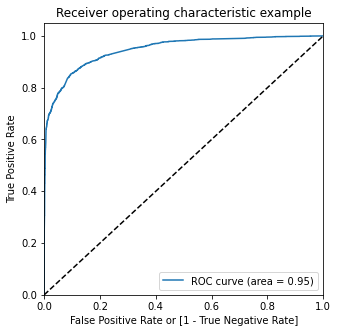

In [164]:
# Plotting the ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [165]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.051862,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.027746,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.076812,1033,0,1,0,0,0,0,0,0,0,0,0
3,0,0.081879,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989938,3241,1,1,1,1,1,1,1,1,1,1,1


In [166]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.752318  0.965815  0.620584
0.2   0.2  0.850228  0.905684  0.816010
0.3   0.3  0.879302  0.864086  0.888691
0.4   0.4  0.881660  0.806013  0.928335
0.5   0.5  0.884017  0.780890  0.947649
0.6   0.6  0.880559  0.745881  0.963659
0.7   0.7  0.876316  0.718287  0.973825
0.8   0.8  0.873645  0.695222  0.983736
0.9   0.9  0.861700  0.651977  0.991105


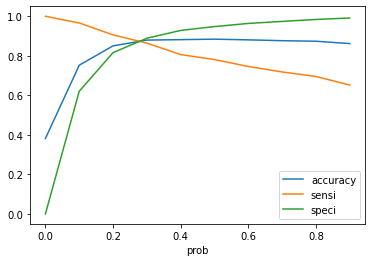

In [167]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [168]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Num_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051862,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.027746,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.076812,1033,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.081879,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989938,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [169]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8793022159358793


In [170]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[3497  438]
 [ 330 2098]]


In [171]:
# Plotting the values
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8640856672158155

In [173]:
# Let us calculate specificity
Specificity = TN / float(TN+FP)
Specificity

0.8886912325285896

In [174]:
# Calculate false postive rate - predicting churn when customer does not have churned
false_postive_rate = print(FP/ float(TN+FP))
false_postive_rate

0.11130876747141041


In [175]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8272870662460567


In [176]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9137705774758297


## Step 12: Precision and Recall and F1 score

In [177]:
# Looking at the confusion matrix again

In [178]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[3497  438]
 [ 330 2098]]


Precision
TP / TP + FP

In [179]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9019980970504282

Recall
TP / TP + FN

In [180]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7808896210873146

In [181]:
# Cheking the precision score
Precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
Precision

0.8272870662460567

In [182]:
# Cheking the recall score
Recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
Recall

0.8640856672158155

### F1 score

In [183]:
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
F1_Score

0.8452860596293311

### Precision and recall tradeoff

In [184]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    0
 6361    0
 6362    0
 Name: final_predicted, Length: 6363, dtype: int64)

In [185]:
# Assigning the variables to Precision, Recall and Thresholds to build a curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

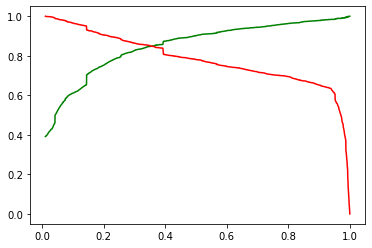

In [186]:
# Plotting the precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

## Step 13: Making predictions on the test set

In [187]:
# Checking the variable
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [188]:
# TTransforming the test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [189]:
# Assigning the test data to col7
X_test = X_test[col7]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Other Tags,Tags_Will revert after reading the email
6906,0,1.919395,0,0,0,0,0,0,1,0,0,0,1
1873,0,-0.546142,0,0,0,0,0,0,1,0,0,0,0
771,0,-0.797465,0,0,0,1,0,0,0,0,0,0,0
4495,0,-0.623190,0,0,0,1,0,0,0,0,0,0,0
9061,0,2.392690,0,0,0,1,0,0,0,0,0,1,0


In [190]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)

In [191]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

6906    0.996498
1873    0.156628
771     0.035946
4495    0.042778
9061    0.676409
dtype: float64

In [192]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [193]:
# Let's see the head
y_pred_1.head()

,0
6906,0.996498
1873,0.156628
771,0.035946
4495,0.042778
9061,0.676409


In [194]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [195]:
# Putting Lead_Num_ID to index
y_test_df['Lead_Num_ID'] = y_test_df.index

In [196]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [198]:
# Checking the head
y_pred_final.head()

,Converted,Lead_Num_ID,0
0,1,6906,0.996498
1,0,1873,0.156628
2,0,771,0.035946
3,0,4495,0.042778
4,1,9061,0.676409


In [199]:
# Renaming the column to Converted_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [200]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead_Num_ID','Converted','Converted_Prob']]

In [201]:
# Checking the head
y_pred_final.head()

,Lead_Num_ID,Converted,Converted_Prob
0,6906,1,0.996498
1,1873,0,0.156628
2,771,0,0.035946
3,4495,0,0.042778
4,9061,1,0.676409


In [202]:
# 0.38 is the optimum point to take it as a cutoff probability.
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [203]:
# Cheking the head
y_pred_final.head()

,Lead_Num_ID,Converted,Converted_Prob,final_predicted
0,6906,1,0.996498,1
1,1873,0,0.156628,0
2,771,0,0.035946,0
3,4495,0,0.042778,0
4,9061,1,0.676409,1


In [204]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_true = y_pred_final.Converted, y_pred = y_pred_final.final_predicted)

0.8877887788778878

In [205]:
# Plotting the confusion matrix
confusion2 = metrics.confusion_matrix(y_true = y_pred_final.Converted, y_pred = y_pred_final.final_predicted )
confusion2

array([[1528,  132],
       [ 174,  893]], dtype=int64)

In [206]:
# Plotting the values
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8369259606373008

In [208]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.9204819277108434

In [209]:
# Calculate false postive rate - predicting churn when customer does not have churned
false_postive_rate = print(FP/ float(TN+FP))
false_postive_rate

0.07951807228915662


In [210]:
# Positive predictive value 
print (TP / float(TP+FP))

0.871219512195122


In [211]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8977673325499412


In [212]:
# Checking the precision score
precision_score(y_true = y_pred_final.Converted, y_pred = y_pred_final.final_predicted)

0.871219512195122

In [213]:
# Checking the recall score
recall_score(y_true = y_pred_final.Converted, y_pred = y_pred_final.final_predicted)

0.8369259606373008

Conclusions:
* we can see that the model is performing good with the test data with accuracy of more than 80 percent. Also the  sensitivity is above 80 percent which implies model would br correct at more than 80 trails out of 100.

* We can see recall score is 83% which implies the model is 83 percent efficient in predicting the Hot leads.

## Step 14: Assigning Lead Score with respect to Lead_Num_ID

In [214]:
# Making new df with lead score
lead_score_df = pd.DataFrame()
df1 = y_train_pred_final[['Lead_Num_ID','Converted_Prob']]
df2 = y_pred_final[['Lead_Num_ID','Converted_Prob']]

In [215]:
# Appending the index
lead_scorer_df=df1.append(df2,ignore_index=True)

In [216]:
# Checking the head
lead_scorer_df.head()

,Lead_Num_ID,Converted_Prob
0,302,0.051862
1,6087,0.027746
2,1033,0.076812
3,7656,0.081879
4,3241,0.989938


In [217]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [218]:
# Checking the columns
lead_scorer_df

,Lead_Num_ID,Converted_Prob,Lead Score
0,302,0.051862,5.19
1,6087,0.027746,2.77
2,1033,0.076812,7.68
3,7656,0.081879,8.19
4,3241,0.989938,98.99
...,...,...,...
9085,1939,0.159618,15.96
9086,1540,0.959472,95.95
9087,5198,0.070945,7.09
9088,8660,0.041769,4.18


In [219]:
# dropping Converted_Prob as it is not required
lead_scorer_df.drop('Converted_Prob',1,inplace=True)

In [220]:
# Printing the top 10 values 
lead_scorer_df.head(10)

,Lead_Num_ID,Lead Score
0,302,5.19
1,6087,2.77
2,1033,7.68
3,7656,8.19
4,3241,98.99
5,5738,3.49
6,7366,4.18
7,3680,2.08
8,4170,98.91
9,43,4.93


##### We have successfully plotted the Lead Score to Lead_Num_ID which will help us to identify the Hot Leads which will result in making more precision calls which in turn will increase the accuracy of calls 

## Conclusions
* According to us the variables that are important for verfying the Hot Leads is:
    *  Tags_Closed by Horizzon
    *  Lead Source_Welingak Website
    *  Tags_Will revert after reading the email
    *  Last Activity_SMS Sent
    *  Lead Source_Olark Chat
    *  Lead Origin_Lead Add Form
    *  Total Time Spent on Website